# 1. Perkenalan


| # | Details |
| --- | --- |
| Name | Marwan Musa |
| Dataset | Telco Customer Churn on [kaggle.com](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) |
| Objective | "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." |

---


Penjelasan tiap-tiap fitur di dataset :


| Features | Explanation |
| --- | --- |
| Churn | Customers who left within the last month |
| Services | Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies | 
| Customer account information | how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges |
| Demographic info | Demographic info about customers – gender, age range, and if they have partners and dependents |





Pustaka : [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

New version from IBM: <br>
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

# 2. Import Libraries

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig as save_fig
import pathlib

import warnings
warnings.filterwarnings("ignore")

# For Model
import tensorflow as tf 
from tensorflow import keras
from sklearn.pipeline import Pipeline

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE 
from collections import Counter

# Evaluate Regression Models
from sklearn.metrics import accuracy_score, classification_report

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [155]:
# Checking Tensorflow version
tf.__version__

'2.9.1'

In [156]:
# Checking Keras version
keras.__version__

'2.9.0'

# 3. Data Loading

In [157]:
# Data Loading & Data Head
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [158]:
# Data Tail

data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [159]:
# Copy data original

data_copy = data.copy()

# 4. Data Cleaning

### Drop Unuseful Variable

In [160]:
# We will not use customerID for analysis, so we will delete it
data.drop('customerID', axis = 1, inplace = True)

### Data Shape (Num of Rows and Columns) & Data Type

In [161]:
# Shape Data
print("Data Shape : ", data.shape)

Data Shape :  (7043, 20)


In [162]:
# Check Dataset columns type, missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Dataset ini memiliki 7043 kolom dan 20 baris dengan varian tipe data float, integer dan object. Tidak terdapat missing values di setiap kolomnya. Namun, variabel `TotalCharges` sepertinya bertipe data object padahal seharusnya bertipe float seperti `MonthlyCharges`.

In [163]:
# Convert the type of MonthlyCharges variable to numeric
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors = 'coerce') # errors = coerce set invalid parsing as NaN
data.TotalCharges.isnull().sum() # checking for null values after converting

11

Pengubahan type variabel `TotalCharges` menghasilkan NaN values yang selanjutnya akan dihilangkan karena jumlahnya yang sangat kecil.

In [164]:
# Drop tha missing values
data.dropna(inplace = True)

# 5. Exploratory Data Analysis

### Cek Class Imbalance di Target Variable

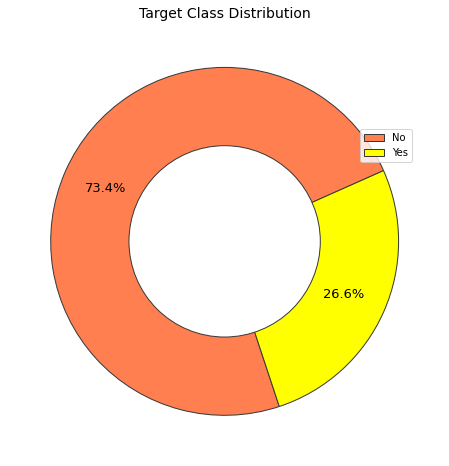

In [165]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# Color Setting
colors = ['coral', 'yellow']
tcolor_dict = {
    True : "coral",
    False : "y"
}
mycmp = LinearSegmentedColormap.from_list("MyCmp", ['#8EBAD9', '#FFFFFF', '#FFF56D'], N=100)
# Plot a pie chart to check if we have class imbalance problem
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(x = data["Churn"].value_counts(), autopct="%1.1f%%",
        pctdistance=.75, startangle=24, textprops={"fontsize":13},
        colors=colors, wedgeprops={'edgecolor':'#383838'});
ax.set_title("Target Class Distribution", fontdict={'fontsize':14})
ax.legend(['No', 'Yes'], bbox_to_anchor=(.8, .77))

centre_circle = plt.Circle((0,0),0.55,fc='white', ec='#383838')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

In [166]:
data['Churn'].groupby(data['Churn']).count()

Churn
No     5163
Yes    1869
Name: Churn, dtype: int64

Terdapat imbalance data di variabel target, dengan rasio 7 banding 3. [/sourcecode-piechart](https://www.kaggle.com/code/junedism/spaceship-titanic-exploratory-data-analysis)

### Checking Unvalid Value in Categorical Variable

In [167]:
# Values tiap kategorikal variabel
for i in data.select_dtypes(include = 'object').columns :
    print(f"Unique values of {i} : {data[i].unique()}")
    print('---'*35)

Unique values of gender : ['Female' 'Male']
---------------------------------------------------------------------------------------------------------
Unique values of Partner : ['Yes' 'No']
---------------------------------------------------------------------------------------------------------
Unique values of Dependents : ['No' 'Yes']
---------------------------------------------------------------------------------------------------------
Unique values of PhoneService : ['No' 'Yes']
---------------------------------------------------------------------------------------------------------
Unique values of MultipleLines : ['No phone service' 'No' 'Yes']
---------------------------------------------------------------------------------------------------------
Unique values of InternetService : ['DSL' 'Fiber optic' 'No']
---------------------------------------------------------------------------------------------------------
Unique values of OnlineSecurity : ['No' 'Yes' 'No internet servic

Tidak ada unvalid values untuk semua variabel kategori. (contoh unvalid values : "`unknown`")

### Explore the Categorical Features

In [168]:
# Inisialisasi fitur kategorik
categorical_features = [feature for feature in data.columns if ((data[feature].dtypes=='O') & (feature not in ['subscribe']))]

# length each feature
for feature in categorical_features:
    print('Fitur {} ini memiliki values kategori sebanyak {}'.format(feature,len(data[feature].unique())))

Fitur gender ini memiliki values kategori sebanyak 2
Fitur Partner ini memiliki values kategori sebanyak 2
Fitur Dependents ini memiliki values kategori sebanyak 2
Fitur PhoneService ini memiliki values kategori sebanyak 2
Fitur MultipleLines ini memiliki values kategori sebanyak 3
Fitur InternetService ini memiliki values kategori sebanyak 3
Fitur OnlineSecurity ini memiliki values kategori sebanyak 3
Fitur OnlineBackup ini memiliki values kategori sebanyak 3
Fitur DeviceProtection ini memiliki values kategori sebanyak 3
Fitur TechSupport ini memiliki values kategori sebanyak 3
Fitur StreamingTV ini memiliki values kategori sebanyak 3
Fitur StreamingMovies ini memiliki values kategori sebanyak 3
Fitur Contract ini memiliki values kategori sebanyak 3
Fitur PaperlessBilling ini memiliki values kategori sebanyak 2
Fitur PaymentMethod ini memiliki values kategori sebanyak 4
Fitur Churn ini memiliki values kategori sebanyak 2


- Terdapat 16 fitur kategorik
- Fitur `PaymentMethod` adalah fitur kategorik dengan varian value terbanyak.

### Categorical Features Distribution

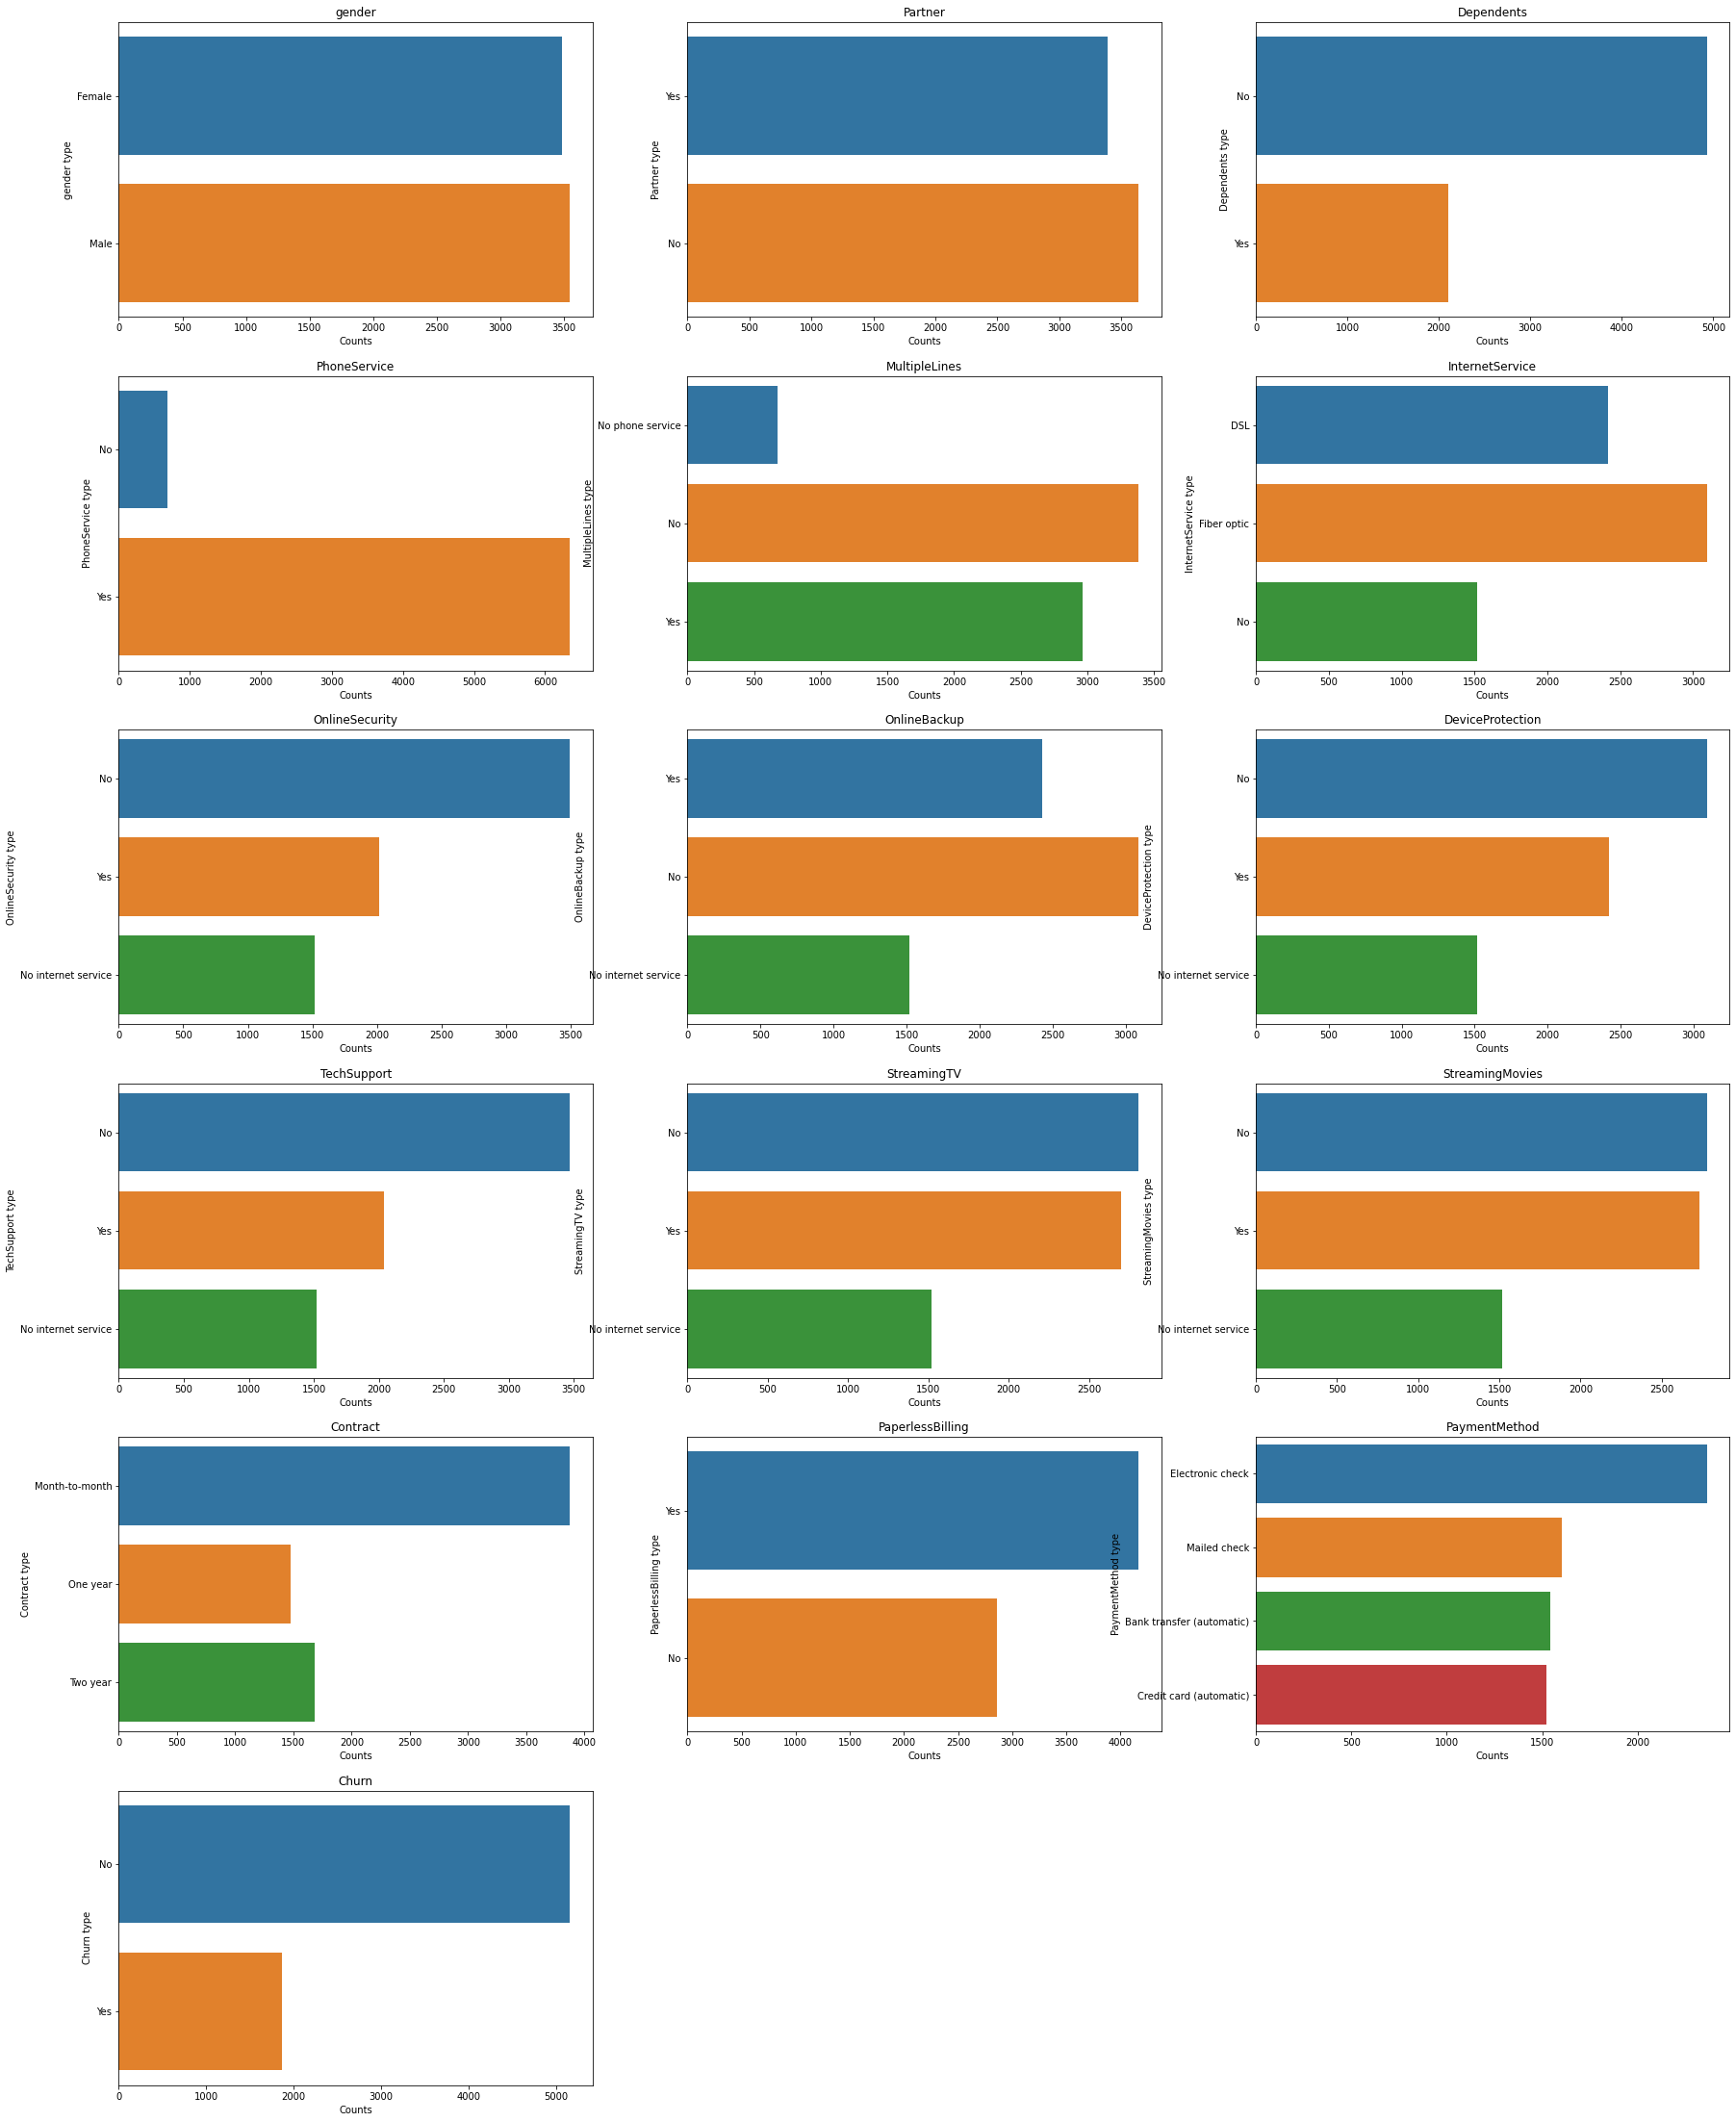

In [169]:
#check count based on categorical features
plt.figure(figsize = (30,80), facecolor = 'white')
iter = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(12, 3, iter)
    sns.countplot(y = categorical_feature, data = data)
    plt.xlabel("Counts")
    plt.ylabel(f"{categorical_feature} type")
    plt.title(categorical_feature)
    iter += 1
plt.show()

- Rasio tiap class di variabel `gender` dan `Partner` hampir memiliki proporsi yang sama.
- Ada perbedaan jumlah yang signifikan untuk tiap class di variabel `PhoneService`, `Dependents`, `PhoneService`, dan `MultipleLines`
- Banyak kontrak tipe `Month-to-month` daripada kontrak `One year` dan `Two year` 
- Lebih banyak `PaymentMethod` yang dilakukan melalui Electronic check
- Sebagian besar customer berlangganan home phone services dan sangat kecil proporsinya yang tidak berlangganan maka bisa dipastikan variabel `PhoneService` ini tidak memberikan dampak yang signifikan di modelling nanti.

### Explore the Numerical Features

In [170]:
# list of numerical variables
numerical_features = data.select_dtypes(exclude='object').columns
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  4


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


Dalam dataset yang digunakan terdapat 4 numerik fitur.

### Numerical Features Distribution and Anomaly

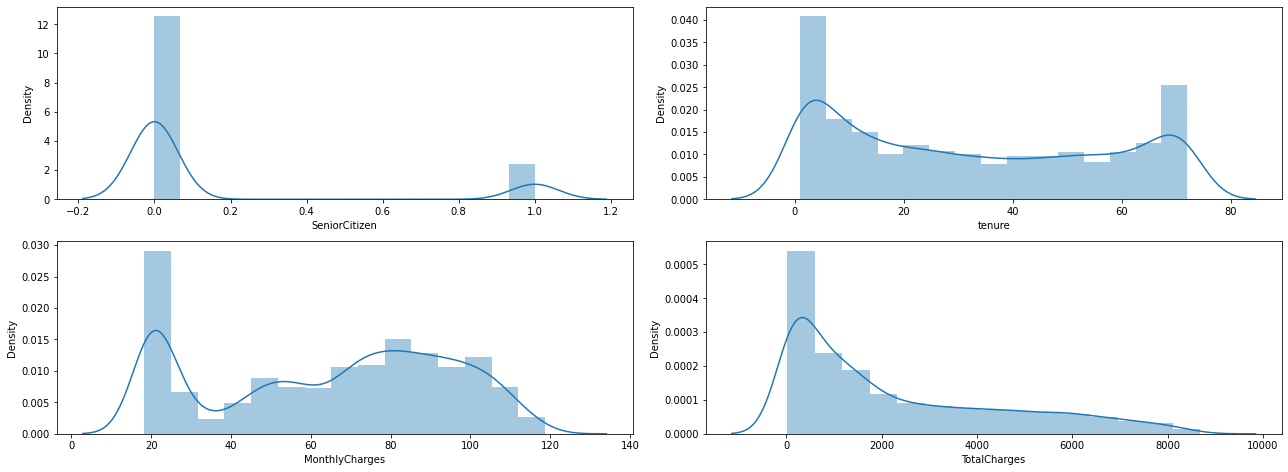

In [171]:
# Visualizing data distribution with distplot 
x = plt.figure(figsize=(18, 16))

for i, j in enumerate(numerical_features):
    x.add_subplot(5, 2, i+1)
    sns.distplot(data[j], bins=15)
    x.tight_layout()

plt.tight_layout()

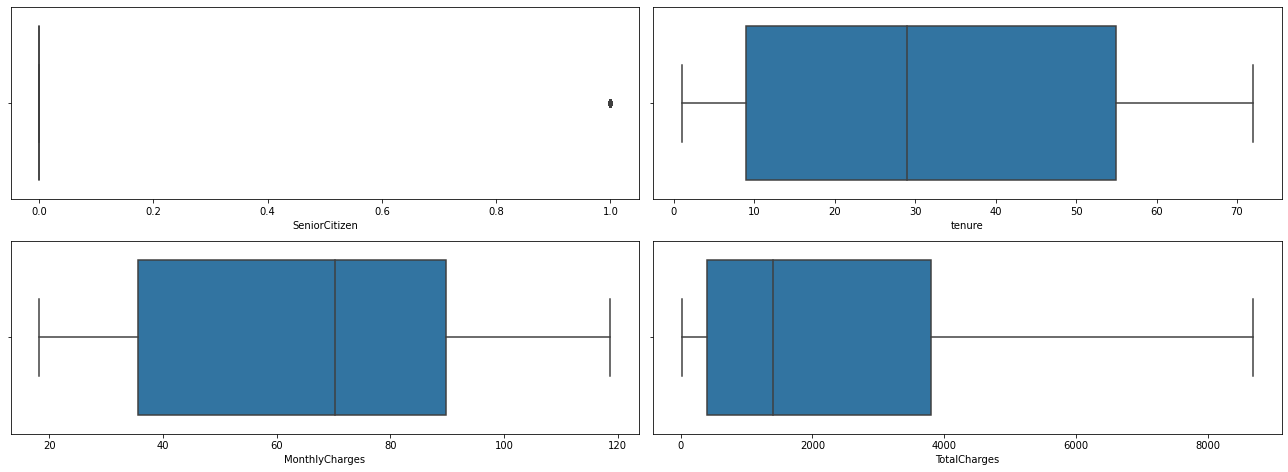

In [172]:
# Visualizing data distribution with boxplot // checking outliers
x = plt.figure(figsize=(18, 16))
for i, j in enumerate(numerical_features):
    x.add_subplot(5, 2, i+1)
    sns.boxplot(data[j])
    x.tight_layout()
plt.tight_layout()

- Semua variabel numerikal kelihatannya terdistribusi skew (nilai skewness akan dihitung di preprocessing section)
- Terdapat outliers di `SeniorCitizen`

###  Relation between Numerical Features and Target Feature

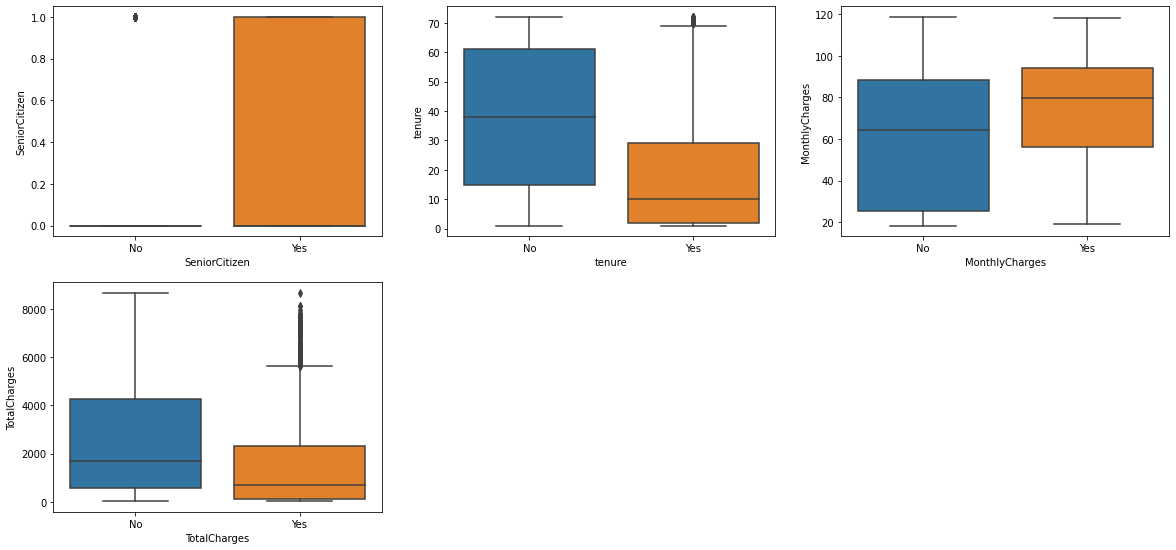

In [173]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in numerical_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(x = "Churn", y = data[feature], data = data)
    plt.xlabel(feature)
    plotnumber += 1
plt.show()

- Semakin besar `tenure` semakin besar kemungkinan customer **stay** (`churn` = `no`).
- Semakin kecil `MonthlyCharges` semakin besar kemungkinan customer untuk **stay** (`churn` = `no`). 

### Correlation between Numerical Features

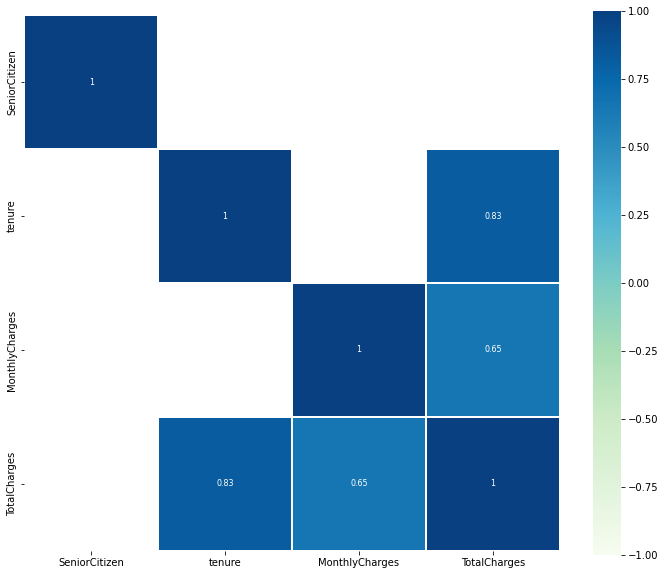

In [174]:
# Checking for correlation by heatmap
corr = data[numerical_features].corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='GnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Variabel `TotalCharges` memiliki korelasi yang tinggi dengan variabel `tenure` dan `MonthlyCharges`

# 6. Data Preprocessing

### *Get Data for Model Inference*

In [175]:
# Get Data for Model Inference

data_inf = data.sample(20, random_state = 0)

In [176]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)

In [177]:
# Reset Index

data_train_test.reset_index(drop = True, inplace = True)
data_inf.reset_index(drop = True, inplace = True)

### *Splitting Dataset*

In [178]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('Churn', axis = 1)
y = data_train_test['Churn']

In [179]:
# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =  0)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (5609, 19)
Test Size :  (1403, 19)


### *Feature Selection*

Summary berdasarkan eksplorasi data di EDA section untuk pertimbangan pemilihan fitur:

- Variabel `TotalCharges` memiliki korelasi yang tinggi dengan variabel `tenure` dan `MonthlyCharges`
- Sebagian besar customer *subscribes* to home phone services dan sangat kecil proporsinya yang *not subscribes* maka bisa dipastikan variabel ini tidak memberikan dampak yang signifikan di modelling nanti.

Berdasarkan summary di atas, kita akan drop variabels `PhoneService`(untuk fitur kategorik) dan `TotalCharges` untuk fitur numerik.

In [180]:
# Choosing columns for modeling

X_train = X_train[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']]
X_test = X_test[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']]

### *Handling Missing Values*

In [181]:
# Check Missing Values on X_train

X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
dtype: int64

In [182]:
# Check Missing Values on X_test

X_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
dtype: int64

In [183]:
# Check Missing Values on y_train

y_train.isnull().sum()

0

In [184]:
# Check Missing Values on y_test

y_test.isnull().sum()

0

### *Handling Outlier*

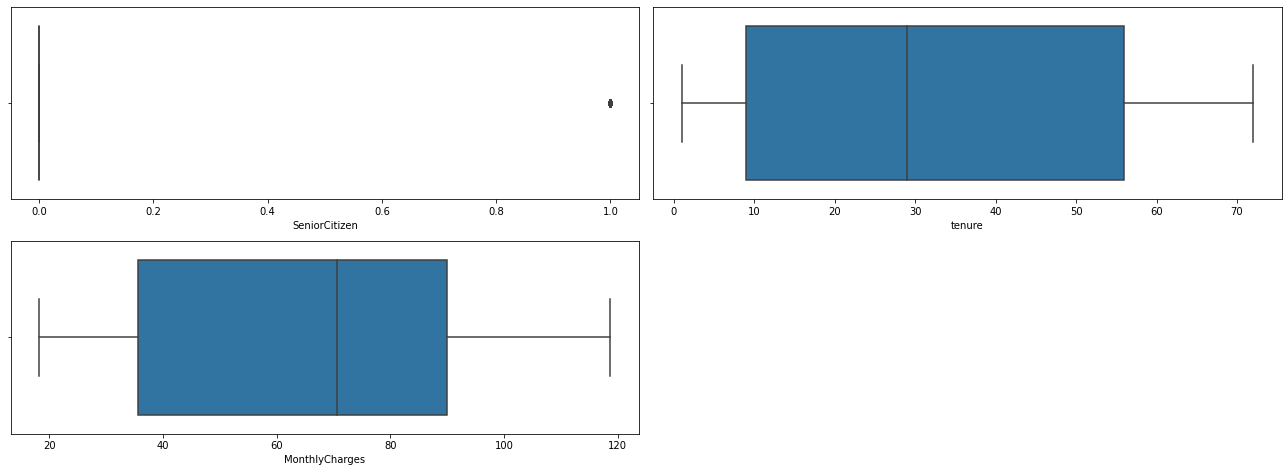

In [185]:
# Boxploting every feature on X_train to see outlier (Before Handling)

x = plt.figure(figsize=(18, 16))
for i, j in enumerate(X_train.select_dtypes(exclude='object').columns):
    x.add_subplot(5, 2, i+1)
    sns.boxplot(X_train[j])
    x.tight_layout()
plt.tight_layout()

Tidak dilakukan *handling outliers* di variabel `SeniorCitizen` (*Indicates if the customer is 65 or older*) karena variabel ini adalah kategorikal variabel dalam bentuk numerik.

### *Split between Numerical and Categorical Columns*

In [186]:
# Splitting ordinal and nominal values
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
cat_cols = ['gender', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 
          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
          'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
          'PaymentMethod']

### *Feature Scaling and Encoding*

In [187]:
# Check if the data have normal distribution for each numerical column on X_train
# If skewness is between -0.5 and 0.5, the distribution is approximately symmetric

normaldist_columns = []
nonnormaldist_columns = []

for i in X_train.select_dtypes(exclude='object').columns:
    g = X_train[i].skew()
    normaldist_columns.append(i) if g <= 0.5 and g >= -0.5 else nonnormaldist_columns.append(i)
    
print('Number of normal distribution data ',len(normaldist_columns))
print('Number of nonnormal distribution data ',len(nonnormaldist_columns))
print('Columns with normal distribution on X_train : ', normaldist_columns)
print('Columns with non - normal distribution on X_train : ', nonnormaldist_columns)

Number of normal distribution data  2
Number of nonnormal distribution data  1
Columns with normal distribution on X_train :  ['tenure', 'MonthlyCharges']
Columns with non - normal distribution on X_train :  ['SeniorCitizen']


In [188]:
# Scale and encode
scale_n_encode = ColumnTransformer([('standard', StandardScaler(), normaldist_columns), # Scaling features with normal distribution
                                  ('minmax', MinMaxScaler(), nonnormaldist_columns), # Scaling features with nonnormal distribution
                                  ('nominal', OneHotEncoder(), cat_cols)]) # We will assume that all cat features are nominal type

X_train_sne = scale_n_encode.fit_transform(X_train)
X_test_sne = scale_n_encode.transform(X_test)

### *Target Encoding*

In [189]:
# prepare target
def prepare_targets(y_tr, y_te):
	le = LabelEncoder()
	le.fit(y_train)
	y_tr_enc = le.transform(y_tr)
	y_te_enc = le.transform(y_te)
	return y_tr_enc, y_te_enc

In [190]:
# Encode the target
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

### *Define Validation Set*

In [191]:
X_trains, X_val = X_train_sne[:4500], X_train_sne[4500:]
y_trains, y_val = y_train_enc[:4500], y_train_enc[4500:]

# 7. Model Defining

### *Input Pipeline*

In [192]:
# Setting Autotune
AUTOTUNE = tf.data.AUTOTUNE

def preprocessing(data, label):
    
    """function that takes the data and labels, 
    standarize the data and return the standarized
    data and the labels"""
    
    mean = tf.reduce_mean(data, axis=0)
    std = tf.math.reduce_std(data, axis=0)
    
    preprocessed_data = (data - mean) / std
    
    return preprocessed_data, label


# Fungsi untuk membuat batches
def get_batches(x, y, shuffle_buffer_size, batch_size, shuffle=False):
    
    #Building a pipeline from a data that exists in memory
    data_ds = tf.data.Dataset.from_tensor_slices((x, y))
    
    #mapping the fuction we alredy made to the data
    preprocessed_data = data_ds.map(preprocessing)
    
    
    if shuffle:
        # if we want to shuffle the dataset given a buffer size
        shuffled_data = preprocessed_data.shuffle(shuffle_buffer_size)
        
        # prefetch` lets the dataset fetch batches in the background while the model is training.
        data_batches = shuffled_data.batch(batch_size).cache().prefetch(AUTOTUNE) #berapa banyak batch yg ingin di prefetch
        
    else: 
                
        data_batches = preprocessed_data.batch(batch_size).cache().prefetch(AUTOTUNE)
       
       
    return data_batches 

Dalam fungsi di atas sudah di inisialisasi `prefetch` (*autotune* mode), `shuffle`, dan `cache` untuk mempercepat waktu pemrosesan (parallel processing mode). Building `pipeline` ada dalam fungsi **get_batches**.

In [193]:
# Prepare the training and testing batches
training_batches = get_batches(X_trains, y_trains, 1024, 64, shuffle = True)
validation_batches = get_batches(X_val, y_val, 1024, 64, shuffle = False)
testing_batches = get_batches(X_test_sne, y_test_enc, 256, 64, shuffle = False)

Untuk data **train** dan **validation**, shuffle buffer size di set 1024, batch size 64. Seangkan untuk data **testing** shuffle buffer size di set 256, batch size 64.

### *Creating the Model using Squential API*

In [194]:
# Define the model with Sequential API
model_seq = keras.models.Sequential()
model_seq.add(keras.Input(shape = X_trains.shape[1:]))
model_seq.add(keras.layers.Dense(256, activation = "relu"))
model_seq.add(keras.layers.Dense(128, activation = "relu"))
model_seq.add(keras.layers.Dense(1, activation="sigmoid"))

# compiling
model_seq.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics=['acc'])

Untuk base model sequential ini, digunakan 4 layer 
- 1 input layer, 
- 2 hidden layers(yang masing-masing memiliki 256 dan 128 neurons dengan fungsi activation "`relu`"), dan 
- 1 output(dengan fungsi activation "`sigmoid`").  

Untuk output, digunakan "`sigmoid`" activation karena target variabelnya bersiat *binary* sehingga untuk compile pun fungsi loss yang digunakan adalah "`binary_crossentropy`" dengan optimizer "`adam`".

Untuk activation di hidden layers, digunakan fungsi `relu` karena computationally efficient, tidak semua neuron diaktivasi saat processing jika output dari transformasi linier di suatu neuron bernilai lebih kecil dari 0, sehingga komputasinya lebih cepat. Namun, kekurangan `relu` ini jika dilakukan backpropagation process, gradient value neuron yang 0 tadi tidak akan mengupdate weight dan biasnya sehingga akan ada neuron yang tidak akan pernah teraktivasi (`dead neurons`).

Untuk optimizer, digunakan `adam` karena merupakan  *most common use* optimizer, *convergence speed* yang cepat, merupakan gabungan dari algoritma `momentum` dan `RMSprop` optimizer, dan tidak perlu dilakukan *tuning learning rate* karena bersifat *adaptive to learning rate*.

### *Creating the Model using Functional API*

In [195]:
# Define the model with Functional API
input_ = keras.layers.Input(shape = X_trains.shape[1:])
hidden1 = keras.layers.Dense(256, activation = "relu")(input_)
hidden2 = keras.layers.Dense(128, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1, activation="sigmoid")(concat)
model_fun = keras.models.Model(inputs = [input_], outputs = [output])

# compiling
model_fun.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics=['acc'])

Sama seperti di sequential model sebelumnya, untuk model functional ini semua parameter yang digunakan sama, namun memiliki perbedaan di cara penulisannya dan ada tambahan layer `concat` setelah `hidden layer` terakhir.

# 8. Model Training

### *Training Model Sequential API*

In [196]:
# ClearSession
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Compiling model with Seq-API
history_seq = model_seq.fit(training_batches, epochs = 40, validation_data = validation_batches)

Epoch 1/40
71/71 [==============================] - 3s 23ms/step - loss: 0.4524 - acc: 0.7780 - val_loss: 0.4169 - val_acc: 0.8007
Epoch 2/40
71/71 [==============================] - 1s 15ms/step - loss: 0.4156 - acc: 0.8011 - val_loss: 0.4160 - val_acc: 0.8016
Epoch 3/40
71/71 [==============================] - 1s 15ms/step - loss: 0.4073 - acc: 0.8082 - val_loss: 0.4163 - val_acc: 0.7962
Epoch 4/40
71/71 [==============================] - 1s 16ms/step - loss: 0.4007 - acc: 0.8122 - val_loss: 0.4172 - val_acc: 0.7971
Epoch 5/40
71/71 [==============================] - 1s 20ms/step - loss: 0.3947 - acc: 0.8142 - val_loss: 0.4181 - val_acc: 0.7899
Epoch 6/40
71/71 [==============================] - 1s 18ms/step - loss: 0.3887 - acc: 0.8176 - val_loss: 0.4198 - val_acc: 0.7917
Epoch 7/40
71/71 [==============================] - 1s 15ms/step - loss: 0.3827 - acc: 0.8196 - val_loss: 0.4222 - val_acc: 0.7899
Epoch 8/40
71/71 [==============================] - 1s 15ms/step - loss: 0.3767 - a

In [197]:
# summary model
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               11008     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 44,033
Trainable params: 44,033
Non-trainable params: 0
_________________________________________________________________


Berdasarkan summary model ini, ada 44.033 parameter yang terbentuk dengan komposisi 110.008 di layer 1, 32.896 di layer 2, dan 129 di layer output.

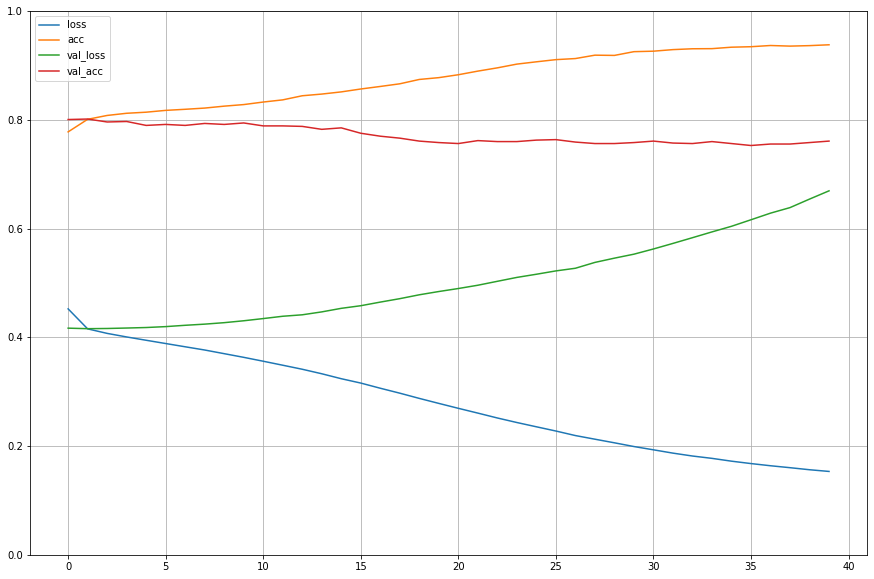

In [198]:
# Graph plot of train process model
pd.DataFrame(history_seq.history).plot(figsize=(15, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras-plot-seqmodel-base")
plt.show()

Dari grafik terlihat bahwa pergerekan value `loss` - `val_loss` dan `acc` - `val_acc` cenderung divergen setiap *epoch* bertambah, dimana `loss` di training batches dan `acc` di validation batches semakin lama semakin menurun, sedangkan `acc` di training batches dan `loss` di validation batches semakin lama semakin meningkat.

---

### *Training Model with Functional API*

In [199]:
# ClearSession
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Compiling model with Func-API
history_fun = model_fun.fit(training_batches, epochs = 40, validation_data = validation_batches) 

Epoch 1/40
71/71 [==============================] - 3s 25ms/step - loss: 0.4567 - acc: 0.7864 - val_loss: 0.4184 - val_acc: 0.8061
Epoch 2/40
71/71 [==============================] - 1s 21ms/step - loss: 0.4162 - acc: 0.8020 - val_loss: 0.4176 - val_acc: 0.8034
Epoch 3/40
71/71 [==============================] - 1s 18ms/step - loss: 0.4085 - acc: 0.8071 - val_loss: 0.4180 - val_acc: 0.8007
Epoch 4/40
71/71 [==============================] - 1s 21ms/step - loss: 0.4025 - acc: 0.8104 - val_loss: 0.4194 - val_acc: 0.7962
Epoch 5/40
71/71 [==============================] - 1s 16ms/step - loss: 0.3966 - acc: 0.8122 - val_loss: 0.4213 - val_acc: 0.7944
Epoch 6/40
71/71 [==============================] - 1s 19ms/step - loss: 0.3912 - acc: 0.8142 - val_loss: 0.4242 - val_acc: 0.7908
Epoch 7/40
71/71 [==============================] - 1s 17ms/step - loss: 0.3857 - acc: 0.8182 - val_loss: 0.4261 - val_acc: 0.7908
Epoch 8/40
71/71 [==============================] - 1s 17ms/step - loss: 0.3802 - a

In [200]:
# Summary model

model_fun.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 42)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 256)          11008       ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 128)          32896       ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 170)          0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']            

Berdasarkan summary model ini, ada 44.075 parameter yang terbentuk dengan komposisi 110.008 di layer 1, 32.896 di layer 2, dan 171 di layer output.

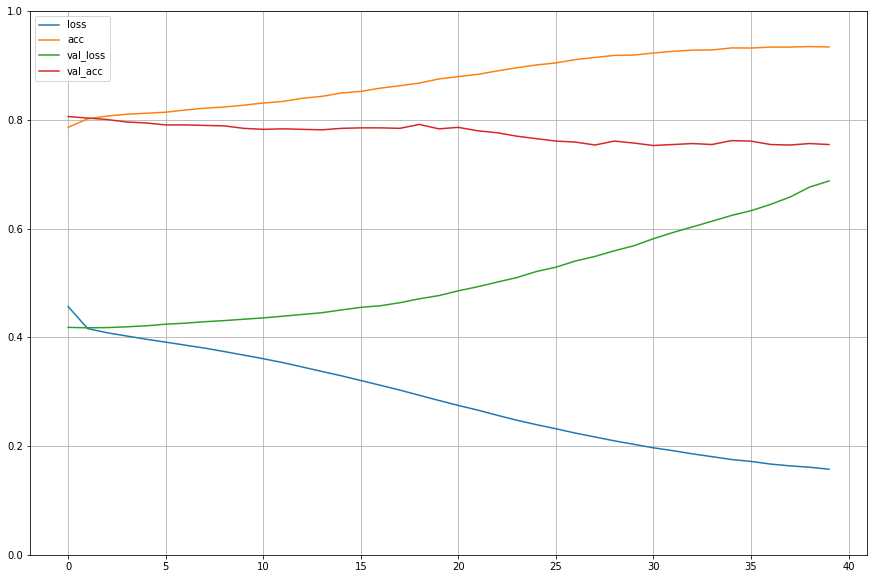

In [201]:
# Graph plot of train process model
pd.DataFrame(history_fun.history).plot(figsize=(15, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras-plot-funmodel-base")
plt.show()

Dari grafik terlihat bahwa pergerekan value `loss` - `val_loss` dan `acc` - `val_acc` cenderung divergen setiap *epoch* bertambah, dimana `loss` di training batches dan `acc` di validation batches semakin lama semakin menurun, sedangkan `acc` di training batches dan `loss` di validation batches semakin lama semakin meningkat. (plot memiliki bentuk yang sama dengan seq-model karena parameter yang digunakan sama)

# 9. Model Improvement

---

### *Improving Sequential Model*

In [202]:
# Define the model with Sequential API
model_seq_imp = keras.models.Sequential()
model_seq_imp.add(keras.Input(shape=(42,)))
model_seq_imp.add(keras.layers.BatchNormalization())
model_seq_imp.add(keras.layers.Dense(256, activation = "relu", kernel_regularizer = tf.keras.regularizers.L1(), kernel_initializer = tf.keras.initializers.GlorotNormal()))
model_seq_imp.add(keras.layers.BatchNormalization())
model_seq_imp.add(keras.layers.Dense(128, activation = "relu", kernel_regularizer = tf.keras.regularizers.L1(), kernel_initializer = tf.keras.initializers.GlorotNormal()))
model_seq_imp.add(keras.layers.Dense(1, activation="sigmoid"))

# compiling
model_seq_imp.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics=['acc'])

Untuk model sequential yang telah di improve ini digunakan 6 layer 
- 1 input layer, 
- 2 hidden layers (yang masing-masing memiliki 256 dan 128 neurons dengan fungsi activation "`relu`", kernel_regularizer `L1`, dan kernel_initializer `GlorotNormal`), 
- 2 layer untuk normalisasi, (berdasarkan referensi yang diketahui, BatchNormalization layer ini optimalnya diinisialisasi sebelum layer activation). dan 
- 1 output(dengan fungsi activation "`sigmoid`").  Untuk output kita memakai activation "`sigmoid`" karena target variabelnya bersiat *binary* sehingga untuk compile pun fungsi loss yang digunakan adalah "`binary_crossentropy`" dengan optimizer "`adam`".

Sedikit berbeda dari parameter yang digunakan di base model sequential, untuk improvement dilakukan penambahan layer `BatchNormalization`, setting `kernel initializers` serta `regulizer` di hidden layer. 
Kenapa digunakan `BatchNormalization`, `initializers` dan `regulizer`? 
- `BatchNormalization` digunakan karena untuk menormalisasikan setiap input ke suatu layer, membagi epochs, memberikan regularization, dan mengurangi error.
- `kernel initializers` sebenarnya default initializers tf.Dense adalah `GlorotUniform`,  namun digunakan `GlorotNormal` karena stddev nya lebih kecil dari  `GlorotUniform`
- `regulizer` L1 digunakan karena lebih robust dari L2,

```python
L1 regularization is more robust than L2 regularization for a fairly obvious reason. L2 regularization takes the square of the weights, so the cost of outliers present in the data increases exponentially. L1 regularization takes the absolute values of the weights, so the cost only increases linearly.
```

In [203]:
# ClearSession
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Compiling model with Seq-API
improved_seq = model_seq_imp.fit(training_batches, epochs = 40, validation_data = validation_batches)

Epoch 1/40
71/71 [==============================] - 5s 31ms/step - loss: 16.8940 - acc: 0.7573 - val_loss: 8.4146 - val_acc: 0.7385
Epoch 2/40
71/71 [==============================] - 2s 27ms/step - loss: 4.2693 - acc: 0.7889 - val_loss: 1.7070 - val_acc: 0.7358
Epoch 3/40
71/71 [==============================] - 2s 24ms/step - loss: 0.9304 - acc: 0.7709 - val_loss: 0.7183 - val_acc: 0.7358
Epoch 4/40
71/71 [==============================] - 2s 31ms/step - loss: 0.5835 - acc: 0.7862 - val_loss: 0.6249 - val_acc: 0.7358
Epoch 5/40
71/71 [==============================] - 2s 23ms/step - loss: 0.5523 - acc: 0.7947 - val_loss: 0.5801 - val_acc: 0.7385
Epoch 6/40
71/71 [==============================] - 2s 24ms/step - loss: 0.5398 - acc: 0.7971 - val_loss: 0.5469 - val_acc: 0.7980
Epoch 7/40
71/71 [==============================] - 2s 27ms/step - loss: 0.5306 - acc: 0.7958 - val_loss: 0.5266 - val_acc: 0.8124
Epoch 8/40
71/71 [==============================] - 2s 24ms/step - loss: 0.5250 - 

In [204]:
# summary model
model_seq_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 42)               168       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               11008     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 45,225
Trainable params: 44,629
Non-traina

Total parameter yang dihasilkan sedikit lebih banyak dari sequential base model dengan selisih 1222 param.

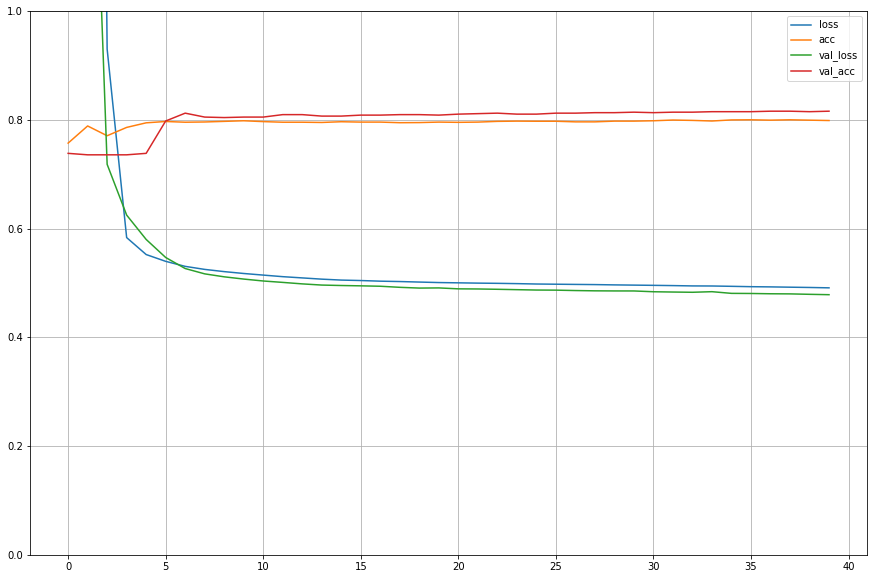

In [205]:
# Graph plot of train process model
pd.DataFrame(improved_seq.history).plot(figsize=(15, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras-plot-seqmodel-improved")
plt.show()

Nilai `accuracy` dan `loss` di validasi sudah cukup konvergen satu sama lain, meskipun nilai `loss` baik di training dan validation batches cukup tinggi di epoch 1 sampai 3 dan akhirnya konvergen di epoch ke 5.

### *Improving Functional Model*

In [206]:
# Define the model improvement
input_ = keras.layers.Input(shape = X_trains.shape[1:])
hidden1 = keras.layers.Dense(1024, activation = "relu")(input_)
drop1 = keras.layers.Dropout(0.1)(hidden1)
hidden2 = keras.layers.Dense(1024, activation = "relu")(drop1)
drop2 = keras.layers.Dropout(0.1)(hidden2)
hidden3 = keras.layers.Dense(1024, activation = "relu")(drop2)
drop3 = keras.layers.Dropout(0.1)(hidden3)
hidden4 = keras.layers.Dense(512, activation = "relu")(drop3)
drop4 = keras.layers.Dropout(0.2)(hidden4)
hidden5 = keras.layers.Dense(256, activation = "relu")(drop4)
drop5 = keras.layers.Dropout(0.2)(hidden5)
hidden6 = keras.layers.Dense(128, activation = "relu")(drop5)
drop6 = keras.layers.Dropout(0.2)(hidden6)
concat = keras.layers.concatenate([input_, drop6])
output = keras.layers.Dense(1, activation="sigmoid")(concat)
model_fun_imp = keras.models.Model(inputs = [input_], outputs = [output])

# Adding Callbacks
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, verbose=1,patience=10, min_lr=0.0000000001)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# compiling
model_fun_imp.compile(optimizer = 'sgd', loss = "binary_crossentropy", metrics=['acc'])

Untuk model functional improvement ini digunakan 15 layer yaitu
- 1 input layer, 
- 6 hidden layers (yang masing-masing memiliki 1024, 512, 256 dan 128 neurons dengan fungsi activation "`relu`"), 
- 6 layer untuk `Dropout` (teknik regularisasi jaringan syaraf dimana beberapa neuron akan dipilih secara acak dan tidak dipakai selama pelatihan. Neuron neuron ini dapat dibilang dibuang secara acak) untuk mencegah overfitting dan mengakselerasi processing.
- 1 layer concat, dan
- 1 output layer (dengan fungsi activation "`sigmoid`").

Sedikit berbeda dari parameter yang digunakan di base model functional, untuk improvement dilakukan penambahan `Callbacks ReduceLROnPlateau` dan `Callbacks EarlyStopping`.

Kenapa digunakan `Callbacks ReduceLROnPlateau` dan `Callbacks EarlyStopping`? 
- `Callbacks ReduceLROnPlateau` digunakan untuk mereduksi learning rate jika metrics yang digunakan (dalam hal ini accuracy) tidak berubah / not improving atau ketika nilainya stagnant.
- `Callbacks EarlyStopping` digunakan untuk menghentikan training epochs ketika performansi model tidak menunjukkan improving performance di validation batches.

In [207]:
# ClearSession
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Compiling model with Func-API
improved_fun = model_fun_imp.fit(training_batches, epochs = 100, validation_data = validation_batches, callbacks=[early_stopping_cb, reduce_lr]) 

Epoch 1/100
71/71 [==============================] - 5s 55ms/step - loss: 0.6049 - acc: 0.6700 - val_loss: 0.5203 - val_acc: 0.7268 - lr: 0.0100
Epoch 2/100
71/71 [==============================] - 2s 22ms/step - loss: 0.4841 - acc: 0.7673 - val_loss: 0.4565 - val_acc: 0.7872 - lr: 0.0100
Epoch 3/100
71/71 [==============================] - 1s 21ms/step - loss: 0.4478 - acc: 0.7876 - val_loss: 0.4334 - val_acc: 0.7980 - lr: 0.0100
Epoch 4/100
71/71 [==============================] - 2s 26ms/step - loss: 0.4329 - acc: 0.8000 - val_loss: 0.4233 - val_acc: 0.8016 - lr: 0.0100
Epoch 5/100
71/71 [==============================] - 2s 32ms/step - loss: 0.4288 - acc: 0.7978 - val_loss: 0.4187 - val_acc: 0.8034 - lr: 0.0100
Epoch 6/100
71/71 [==============================] - 2s 27ms/step - loss: 0.4245 - acc: 0.8020 - val_loss: 0.4159 - val_acc: 0.8079 - lr: 0.0100
Epoch 7/100
71/71 [==============================] - 2s 28ms/step - loss: 0.4229 - acc: 0.7980 - val_loss: 0.4141 - val_acc: 0.809

In [208]:
# Summary model

model_fun_imp.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 42)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 1024)         44032       ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 1024)         0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 1024)         1049600     ['dropout[0][0]']                
                                                                                              

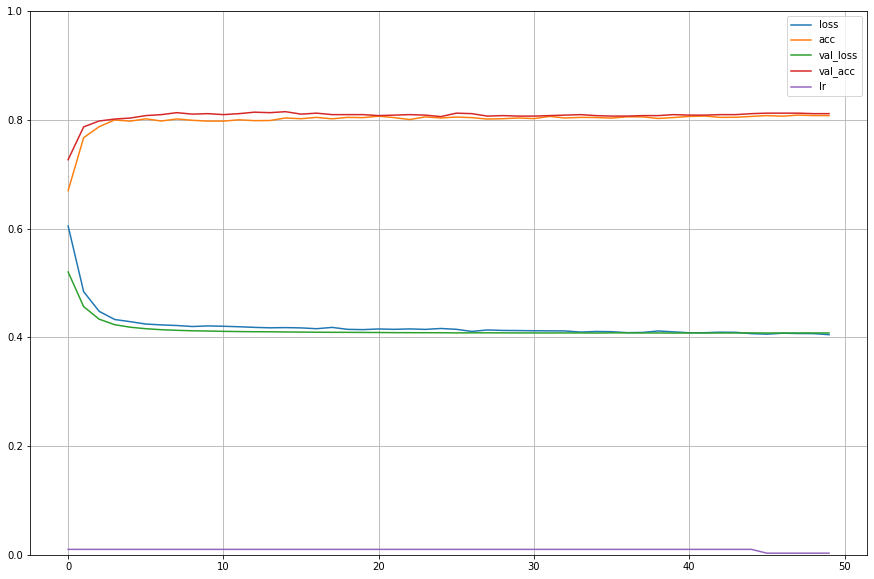

In [209]:
# Graph plot of train process model
pd.DataFrame(improved_fun.history).plot(figsize=(15, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras-plot-funmodel-improved")
plt.show()

Dari plot di atas, dapat dilihat bahwa nilai `accuracy` dan `loss` di training dan validasi batcehs sangat konvergen satu sama lain, jika dibandingkan dengan 3 model sebelumnya. Nilai accuracy semakin lama semakin meningkat baik di training maupun di validation batches, begitupun dengan nilai loss yang semakin lama semakin menurun walaupun seiring berjalannya epochs time nilainya konstan (tidak turun ataupun naik). 

Apakah ini adalah indikasi bahwa model functional improved ini adalah yang terbaik? evaluasi terhadap performansi model dan classification report akan di bahas di *BAB Model Evaluation*.

# 10. Model Evaluation

### *Classification Report on Train Set*

In [223]:
# Predicting
y_predseq1 = model_seq.predict(X_trains)
y_predfun1 = model_seq.predict(X_trains)
y_predseq_imp1 = model_seq_imp.predict(X_trains)
y_predfun_imp1 = model_fun_imp.predict(X_trains)
y_predseq1 = np.where(y_predseq1 > 0.5, 1, 0)
y_predfun1 = np.where(y_predfun1 > 0.5, 1, 0)
y_predseq_imp1 = np.where(y_predseq_imp1 > 0.5, 1, 0)
y_predfun_imp1 = np.where(y_predfun_imp1 > 0.5, 1, 0)

# Classification all models (base and improved)
print("Sequential base model evaluation: \n", classification_report(y_trains, y_predseq1))
print('-'*55)
print("Sequential improved model evaluation: \n", classification_report(y_trains, y_predseq_imp1))
print('-'*55)
print("Functional base model evaluation: \n", classification_report(y_trains, y_predfun1))
print('-'*55)
print("Functional improved model evaluation: \n", classification_report(y_trains, y_predfun_imp1))

141/141 [==============================] - 2s 13ms/step
Sequential base model evaluation: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      3309
           1       0.84      0.60      0.70      1191

    accuracy                           0.86      4500
   macro avg       0.85      0.78      0.81      4500
weighted avg       0.86      0.86      0.86      4500

-------------------------------------------------------
Sequential improved model evaluation: 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      3309
           1       0.00      0.00      0.00      1191

    accuracy                           0.74      4500
   macro avg       0.37      0.50      0.42      4500
weighted avg       0.54      0.74      0.62      4500

-------------------------------------------------------
Functional base model evaluation: 
               precision    recall  f1-score   support

           

### *Classification Report on Test Set*

In [224]:
# Predicting
y_predseq = model_seq.predict(X_test_sne)
y_predfun = model_seq.predict(X_test_sne)
y_predseq_imp = model_seq_imp.predict(X_test_sne)
y_predfun_imp = model_fun_imp.predict(X_test_sne)
y_predseq = np.where(y_predseq > 0.5, 1, 0)
y_predfun = np.where(y_predfun > 0.5, 1, 0)
y_predseq_imp = np.where(y_predseq_imp > 0.5, 1, 0)
y_predfun_imp = np.where(y_predfun_imp > 0.5, 1, 0)

# Classification all models (base and improved)
print("Sequential base model evaluation: \n", classification_report(y_test_enc, y_predseq))
print('-'*55)
print("Sequential improved model evaluation: \n", classification_report(y_test_enc, y_predseq_imp))
print('-'*55)
print("Functional base model evaluation: \n", classification_report(y_test_enc, y_predfun))
print('-'*55)
print("Functional improved model evaluation: \n", classification_report(y_test_enc, y_predfun_imp))

44/44 [==============================] - 1s 11ms/step
Sequential base model evaluation: 
               precision    recall  f1-score   support

           0       0.81      0.91      0.85      1025
           1       0.62      0.42      0.50       378

    accuracy                           0.77      1403
   macro avg       0.71      0.66      0.68      1403
weighted avg       0.76      0.77      0.76      1403

-------------------------------------------------------
Sequential improved model evaluation: 
               precision    recall  f1-score   support

           0       0.73      1.00      0.84      1025
           1       0.00      0.00      0.00       378

    accuracy                           0.73      1403
   macro avg       0.37      0.50      0.42      1403
weighted avg       0.53      0.73      0.62      1403

-------------------------------------------------------
Functional base model evaluation: 
               precision    recall  f1-score   support

           0 

- Jika diperhatikan secara seksama, classification report untuk base model baik di sequential dan functional base model memberikan nilai yang sama karena memang parameter yang digunakan sama namun cara penulisannya saja yang berbeda, yang satu dalam bentuk sequential, dan satunya dalam bentuk functional.
- Untuk accuracy di base model, nilainya mencapai 86% di train set dan 77% di test set, dan untuk improved sequential model nilai accuracy nya mencapai sekitar 73% - 74% di train dan test set. Sedangkan improved functional model memberikan nilai accuracy dengan score 79% - 78% di train dan test setnya. 
- Nilai recall, precission, dan f1-score di semua model sangat jauh berbeda untuk tiap class karena ada imbalance data.
- Jika ingin di analisis lebih lanjut, nilai recall untuk improved sequential model, memberikan nilai dengan selisih 100% dimana model memprediksi benar hanya di class 0 terhadap actual class-nya dan sama sekali tidak memprediksi tepat di class lain terhadap actual class nya baik di train dan test set.
- Untuk precission, model functional yang telah di improved memberikan precission score paling baik dengan hanya selisih 3% di train set dan 7% di test set untuk kedua class di kisaran 70% hingga 80% precission.


Additional Explanation : 

```python
Accuracy : The sum of true positives and true negatives divided by the total number of samples. This is only accurate if the model is balanced. It will give inaccurate results if there is a class imbalance.
Recall : The number of true positives divided by all true positives and all false negatives.
Precission : The number of true positives divided by all true positives and all false positives.
```

# 10. Model Saving

In [217]:
# Save the model in HDF5 format // to use for data inference

model_fun_imp.save("my_keras_model.h5")

In [225]:
# freeze model
for layer in model_fun_imp.layers:
  layer.trainable = False

# Save model not in format
model_fun_imp.save("churn")

INFO:tensorflow:Assets written to: churn\assets


# 11. Model Inference

In [218]:
# Display Inference-Set

data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.65,20.65,No
1,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.60,330.25,No
2,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.80,19.80,No
3,Male,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.25,24.25,Yes
4,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,74.40,Yes
5,Female,0,Yes,Yes,8,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,55.75,446.80,No
6,Male,1,Yes,No,27,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,No,One year,Yes,Electronic check,85.90,2220.10,No
7,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
8,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.15,68.45,No
9,Male,0,Yes,No,48,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),111.45,5315.10,No


In [222]:
# Feature select
data_inf_final = data_inf[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']]
 
# Scale & encode
data_inf_sne = scale_n_encode.transform(data_inf_final)

# Loading model
model_ = keras.models.load_model("my_keras_model.h5")

# Predicting
y_pred_inf = model_.predict(data_inf_sne)
y_pred_inf = np.where(y_pred_inf > 0.5, 'Yes', 'No')

# Concate between Inference-Set and Prediction
data_inf_finaldf = pd.concat([data_inf, pd.DataFrame(y_pred_inf, columns=['Prediction'])], axis=1)
data_inf_finaldf

1/1 [==============================] - 1s 731ms/step


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Prediction
0,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.65,20.65,No,No
1,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.60,330.25,No,No
2,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.80,19.80,No,No
3,Male,0,No,No,1,No,No phone service,DSL,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,24.25,24.25,Yes,Yes
4,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,74.40,74.40,Yes,Yes
5,Female,0,Yes,Yes,8,Yes,Yes,DSL,No,Yes,...,No,No,No,Month-to-month,No,Electronic check,55.75,446.80,No,No
6,Male,1,Yes,No,27,Yes,Yes,Fiber optic,Yes,No,...,No,No,No,One year,Yes,Electronic check,85.90,2220.10,No,No
7,Female,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes,Yes
8,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.15,68.45,No,No
9,Male,0,Yes,No,48,Yes,Yes,Fiber optic,Yes,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),111.45,5315.10,No,No


# 11. Conclusion

Untuk mini-research project kali ini, dataset yang digunakan adalah `Telco-Customer-Churn Dataset`. Dimana, dalam project ini kita membuat model yang bisa meng-*classify* nasabah **stay** (`churn` = `no`) atau **leave** (`churn` = `yes`).



| Problem Statement | Solution | Goal |
| --- | --- | --- |
| Membangun model yang tepat untuk "*churn case*" ini | Menggunakan **ANN** untuk building the model | Menghasilkan model terbaik untuk digunakan sebagai prediktor. Selecting model dengan komparasi "`base model`" dan "`improved model`" |



Sumber dataset : [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

Dataset ini memiliki 7043 kolom dan 20 baris dengan varian tipe data float, integer dan object. Tidak terdapat missing values di setiap kolomnya. Namun terdapat variabel yang tipe datanya tidak sesuai, sehingga dilakukan pengubahan tipe data (dari object menjadi float).

Banyak fakta-fakta menarik yang kami peroleh saat mengeksplorasi dataset ini diantaranya :
- Terdapat imbalance data di variabel target, dengan rasio 7 banding 3
- Fitur PaymentMethod adalah fitur kategorik dengan varian value terbanyak.
- Rasio tiap class di variabel gender dan Partner hampir memiliki proporsi yang sama.
- Ada perbedaan jumlah yang signifikan untuk tiap class di variabel PhoneService, Dependents, PhoneService, dan MultipleLines
- Banyak kontrak tipe Month-to-month daripada kontrak One year dan Two year
- Lebih banyak PaymentMethod yang dilakukan melalui Electronic check
- Sebagian besar customer berlangganan home phone services dan sangat kecil proporsinya yang tidak berlangganan maka bisa dipastikan variabel `PhoneService` ini tidak memberikan dampak yang signifikan di modelling nanti.
- Semua variabel numerikal kelihatannya terdistribusi skew (yang selanjutnya nilai skewness masing-masing variabel dihitung di preprocessing section untuk ditentukan variabelnya di aproksimasi terdistribusi normal atau tidak)
- Semakin besar tenure semakin besar kemungkinan customer stay (churn = no).
- Semakin kecil MonthlyCharges semakin besar kemungkinan customer untuk stay (churn = no)
- Ada beberapa variabel numerikal yang sangat berkorelasi tinggi dengan variabel lain (based on heatmap correlation)

Setelah itu dilakukan preprocessing dataset berdasarkan temuan eksplorasi di atas kemudian memilih fitur-fitur penting (important features) untuk modelling. 

Untuk project kali ini digunakan functional model ANN yang telah di improve untuk pemodelan data inference, karena dibandingkan dengan 3 model lainnya, improved model ini memberikan nilai accuracy yang relative stable. Meskipun base model sequential dan functionalnya memberikan nilai accuracy yang lebih tinggi di train set, namun terindikasi **overfitting** karena selisih accuracy train dan test set nya hampir mencapai 10%. Sedangkan improved fuctional model memberikan accuracy sekitar 78% baik di train maupun di test set.

Pemilihan model terbaik berdasarkan metrik `accuracy` ini sebenarnya memiliki kelemahan, karena tidak cukup baik mewakili performansi model untuk dataset yang imbalance. Sehingga untuk perbaikan kedepannya bisa dilakukan best model selection berdasarkan `f1-score` untuk data imbalance. 

Future improvement lainnya yaitu :
- Lakukan parameter tuning model yang lebih kompleks
- Studi yang lebih detail tentang parameter yang tepat untuk digunakan tiap case (`optimizer`, `initializer`, `regularizer`, banyak neurons optimal tiap layers, dsb)
- Optimasi processing time yang paling tepat dengan memaksimalisasi `shuffle buffer size`, `prefecthing`, `Normalizing` dan sebagainya.





General References:
- https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
- https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/
- https://jurnal.polibatam.ac.id/index.php/JAIC/article/download/2017/1118
- https://www.tensorflow.org/guide/data
- https://www.kode.id 

Kaggle:
- https://www.kaggle.com/code/hyejinjeon/telecome-churn-analysis
- https://www.kaggle.com/code/michalbrezk/classification-tensorflow-deep-nn-xgboost
- https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python
- https://www.kaggle.com/code/sardiirfansyah/tensorflow-input-pipeline-prefetch-tf-data
- https://www.kaggle.com/code/lusfernandotorres/exploratory-data-analysis-and-churn-prediction